<a href="https://colab.research.google.com/github/kumarshivam99/Handwriting-Detection-and-Text-Correction/blob/main/Text_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%tensorflow_version 2.x
#!pip show tensorflow

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np
import string
from string import digits
import cv2
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from nltk.translate.bleu_score import sentence_bleu

In [3]:
%cd ../

/


In [4]:
%ls

bin/      dev/   lib32/  opt/         run/   tensorflow-1.15.2/  var/
boot/     etc/   lib64/  proc/        sbin/  tmp/
content/  home/  media/  python-apt/  srv/   tools/
datalab/  lib/   mnt/    root/        sys/   usr/


In [5]:
%cd  /content/gdrive/My Drive

/content/gdrive/My Drive


In [7]:
from tensorflow.keras.models import load_model

model=load_model('cnn_model-10-epochs.h5')

In [9]:
lines= pd.read_csv('input_word.csv')
lines

,a
0,abandoned
1,ability
2,ablaze
3,able
4,about
...,...
2366,yours
2367,yourself
2368,youth
2369,youve


In [10]:
lines["a"]=lines["a"].astype(str)
lines["k"]=lines["a"].apply(lambda x: [ch for ch in x])

coustum_dict=[str(),[],0]

temp=coustum_dict.copy()
temp

sequences=[[]]
for j in range(len(lines)):
  temp=coustum_dict.copy()
  a,k=lines.iloc[j]
  temp[0]=a
  temp[1]=k
  if(j==0):
     sequences[j]=temp
  else:   
    sequences.append(temp)


In [11]:
def word_pred(word):
  word_list=sequences
  r=np.shape(word_list)
  for i in range(r[0]):
    score=sentence_bleu(word_list[i][1], word, weights=(0.25, 0.25, 0.25, 0.25))
    word_list[i][2]=score

  ordered = sorted(word_list, key=lambda x:x[2],reverse=True)
  ordered=ordered[:20]

  output=[[]]
  k=0

  for j in range(10):
    if(len(ordered[j][1])>len(word) or len(ordered[j][1])<len(word)+2):
        output.append(ordered[j])


  return output

In [12]:
#path = '/content/drive/My Drive'
path =''

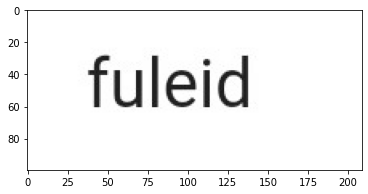

In [13]:
img = mpimg.imread(os.path.join(path, 'fuleid.JPG'))
plt.imshow(img)

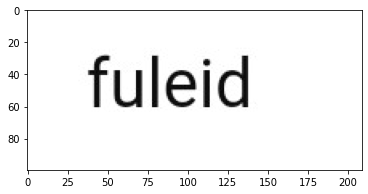

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Converting to GrayScale
plt.imshow(gray, cmap='gray')

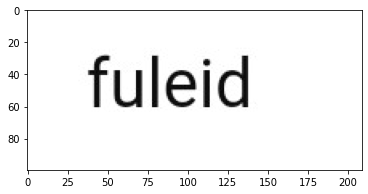

In [15]:
kernel = np.ones((5,5),np.uint8)
#gray = cv2.dilate(gray , kernel, iterations = 1)
plt.imshow(gray, cmap='gray')

In [16]:
#img = mpimg.imread('20.jpg')
h, w = img.shape[:2]
image_size = h*w
mser = cv2.MSER_create()
mser.setMaxArea(int(image_size/2))
mser.setMinArea(10)

gray_copy = np.copy(gray)
_, bw = cv2.threshold(gray_copy, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

regions, rects = mser.detectRegions(bw)
for (x, y, w, h) in rects:
    cv2.rectangle(gray_copy, (x, y), (x+w, y+h), color=(0, 0, 255), thickness=3)

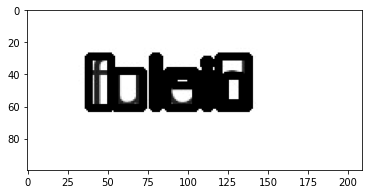

In [17]:
plt.imshow(gray_copy, cmap='gray')

In [18]:
print(rects)

[[119  29  19  32]
 [ 54  38  18  23]
 [110  31   4   4]
 [110  38   4  23]
 [ 87  38  18  23]
 [ 78  29   4  32]
 [ 38  29  14  32]
 [123  41  11  17]
 [ 91  41  11   6]]


In [19]:
a=rects

In [20]:
a = a[a[:,0].argsort(kind='mergesort')]
print(a)

[[ 38  29  14  32]
 [ 54  38  18  23]
 [ 78  29   4  32]
 [ 87  38  18  23]
 [ 91  41  11   6]
 [110  31   4   4]
 [110  38   4  23]
 [119  29  19  32]
 [123  41  11  17]]


In [21]:
rects=a

In [22]:
print(type(rects))

<class 'numpy.ndarray'>


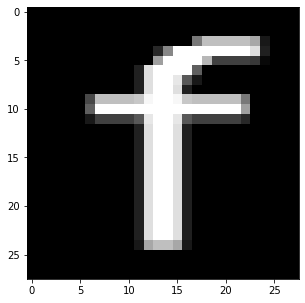

In [23]:
i = 0
#crop_img1 = gray[rects[i][1]-10:rects[i][1]+rects[i][3]+10, rects[i][0]-10:rects[i][0]+rects[i][2]+10]
crop_img1 = gray[rects[i][1]-5:rects[i][1]+rects[i][3]+5, rects[i][0]-5:rects[i][0]+rects[i][2]+2]
ret, thresh_img = cv2.threshold(crop_img1, 127.5, 255, cv2.THRESH_BINARY_INV)
crop_img = cv2.resize(thresh_img, (28, 28))
plt.figure(figsize = (5,5))
plt.imshow(crop_img, cmap='gray')
plt.show()

In [24]:
crop_img = crop_img.reshape(1, 28, 28, 1)
crop_img = np.asarray(crop_img, np.float)
crop_img /= 255

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [25]:
pred1=model.predict(crop_img)
maxi = np.argmax(pred1)
print(maxi)

15


In [26]:
'''images = []
for i in range(len(rects)):
    if rects[i][3] >= 20 and rects[i][2] >= 20:
        crop_img1 = gray[rects[i][1]-10:rects[i][1]+rects[i][3]+10, rects[i][0]-20:rects[i][0]+rects[i][2]+20]
        ret, thresh_img = cv2.threshold(crop_img1, 127.5, 255, cv2.THRESH_BINARY_INV)
        crop_img = cv2.resize(thresh_img, (28, 28))
        images.append(crop_img)'''

'images = []\nfor i in range(len(rects)):\n    if rects[i][3] >= 20 and rects[i][2] >= 20:\n        crop_img1 = gray[rects[i][1]-10:rects[i][1]+rects[i][3]+10, rects[i][0]-20:rects[i][0]+rects[i][2]+20]\n        ret, thresh_img = cv2.threshold(crop_img1, 127.5, 255, cv2.THRESH_BINARY_INV)\n        crop_img = cv2.resize(thresh_img, (28, 28))\n        images.append(crop_img)'

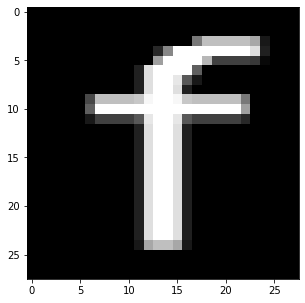

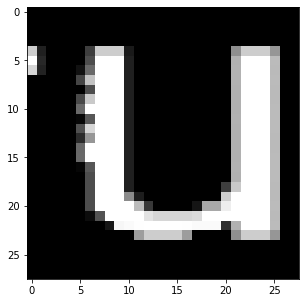

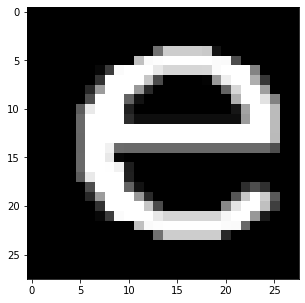

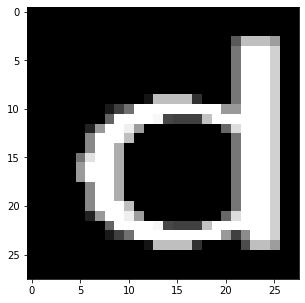

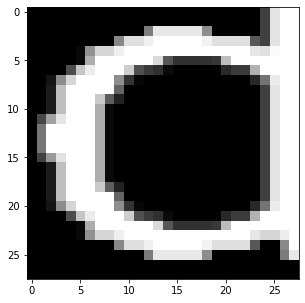

In [27]:

# visualization of each bounded characters
images = []
for i in range(len(rects)):
    if rects[i][3] >= 15 and rects[i][2] >= 10:
        crop_img1 = gray[rects[i][1]-5:rects[i][1]+rects[i][3]+5, rects[i][0]-5:rects[i][0]+rects[i][2]+2]
        ret, thresh_img = cv2.threshold(crop_img1, 127, 255, cv2.THRESH_BINARY_INV)
        crop_img = cv2.resize(thresh_img, (28,28))
        images.append(crop_img)

for i in range(len(images)):
    
    plt.figure(figsize=(5,5))
    plt.imshow(images[i], cmap='gray')

In [28]:
images_copy = np.asarray(images, np.float)
images_copy = images_copy.reshape(len(images), 28, 28, 1)
images_copy /= 255

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [29]:
pred=model.predict(images_copy)
print(pred[0])

[1.2163933e-14 8.1638531e-17 1.6365988e-14 1.3601032e-16 9.7137576e-12
 1.4316347e-12 8.7916709e-18 5.8591507e-11 4.9927190e-10 2.5230299e-14
 4.9213526e-11 1.0257565e-14 5.0213274e-15 3.3490204e-17 2.7492540e-06
 5.1118916e-01 4.8712071e-13 2.1217076e-15 4.1697517e-06 5.9581260e-09
 7.3925116e-13 4.0286424e-12 7.9820949e-19 2.8827931e-21 3.4873885e-17
 4.9595896e-12 7.1271304e-18 5.1093651e-13 2.0371976e-16 1.2851618e-03
 2.4185290e-25 2.3964115e-20 7.3779933e-23 3.3417461e-17 7.1136114e-16
 5.3479426e-10 1.3523360e-11 9.0064680e-13 1.6692381e-17 4.3005377e-10
 6.8087414e-02 1.1177220e-08 9.7466013e-13 2.0015981e-19 3.2751936e-07
 4.3033137e-09 4.1943100e-01]


In [30]:
import pandas as pd
pred_dataframe = pd.DataFrame(pred)

In [31]:
print(pred_dataframe)

             0             1             2             3             4   \
0  1.216393e-14  8.163853e-17  1.636599e-14  1.360103e-16  9.713758e-12   
1  7.803187e-08  8.825838e-05  7.047991e-08  2.243154e-16  1.510084e-06   
2  2.613305e-12  1.680510e-19  6.810822e-12  4.073440e-20  2.757408e-18   
3  5.314635e-06  1.706334e-15  2.280950e-16  3.005209e-19  3.316847e-11   
4  1.416586e-02  1.840896e-12  2.089320e-13  8.297437e-25  1.185101e-08   

             5             6             7             8             9   ...  \
0  1.431635e-12  8.791671e-18  5.859151e-11  4.992719e-10  2.523030e-14  ...   
1  2.578536e-14  1.247154e-09  4.401876e-10  2.337533e-18  7.179819e-16  ...   
2  4.180872e-19  4.938603e-16  3.805761e-23  2.590323e-12  4.396193e-14  ...   
3  8.127302e-17  9.278719e-12  8.788918e-24  1.094378e-17  5.404440e-16  ...   
4  1.991980e-11  4.817533e-15  4.623550e-22  4.614233e-20  1.360376e-17  ...   

             37            38            39            40           

In [32]:
pred_dataframe.idxmax(axis = 1)

0    15
1    30
2    39
3    38
4    12
dtype: int64

In [33]:
final_pred=pred_dataframe.idxmax(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':


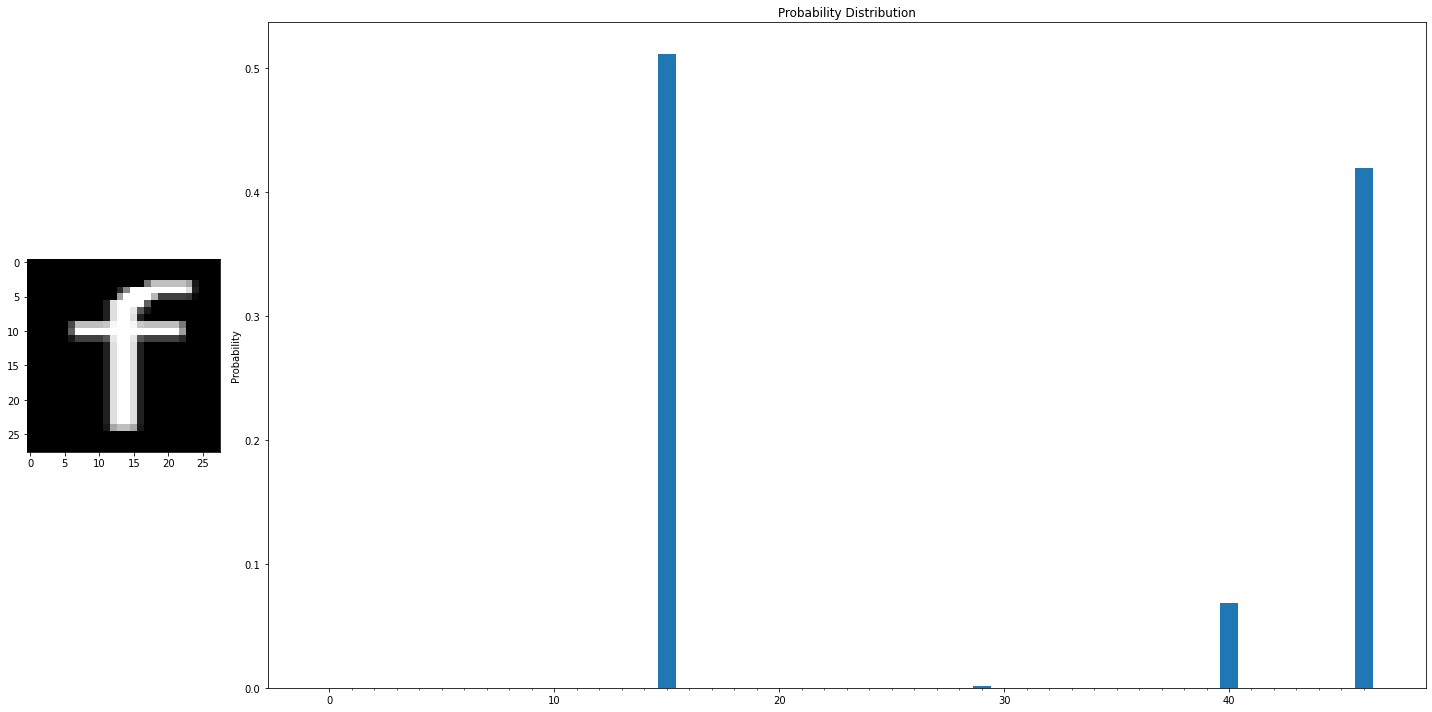

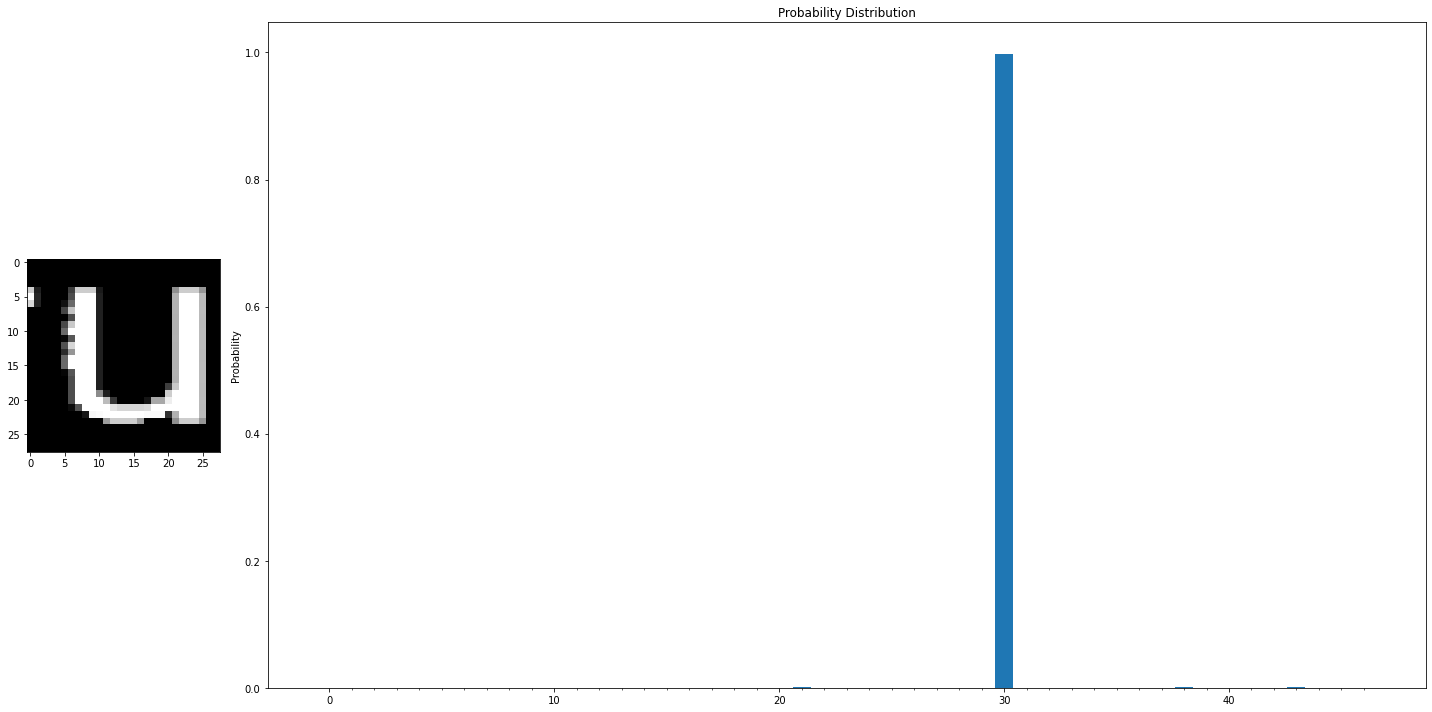

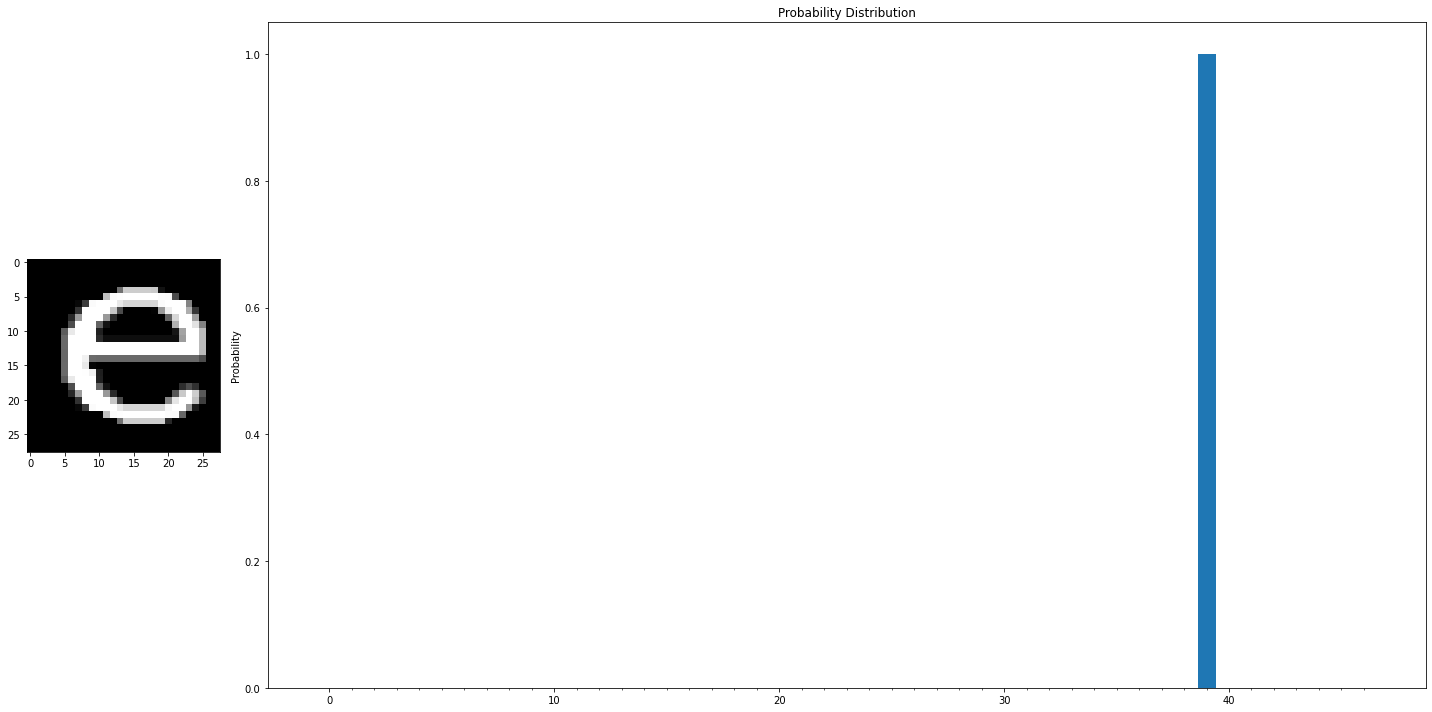

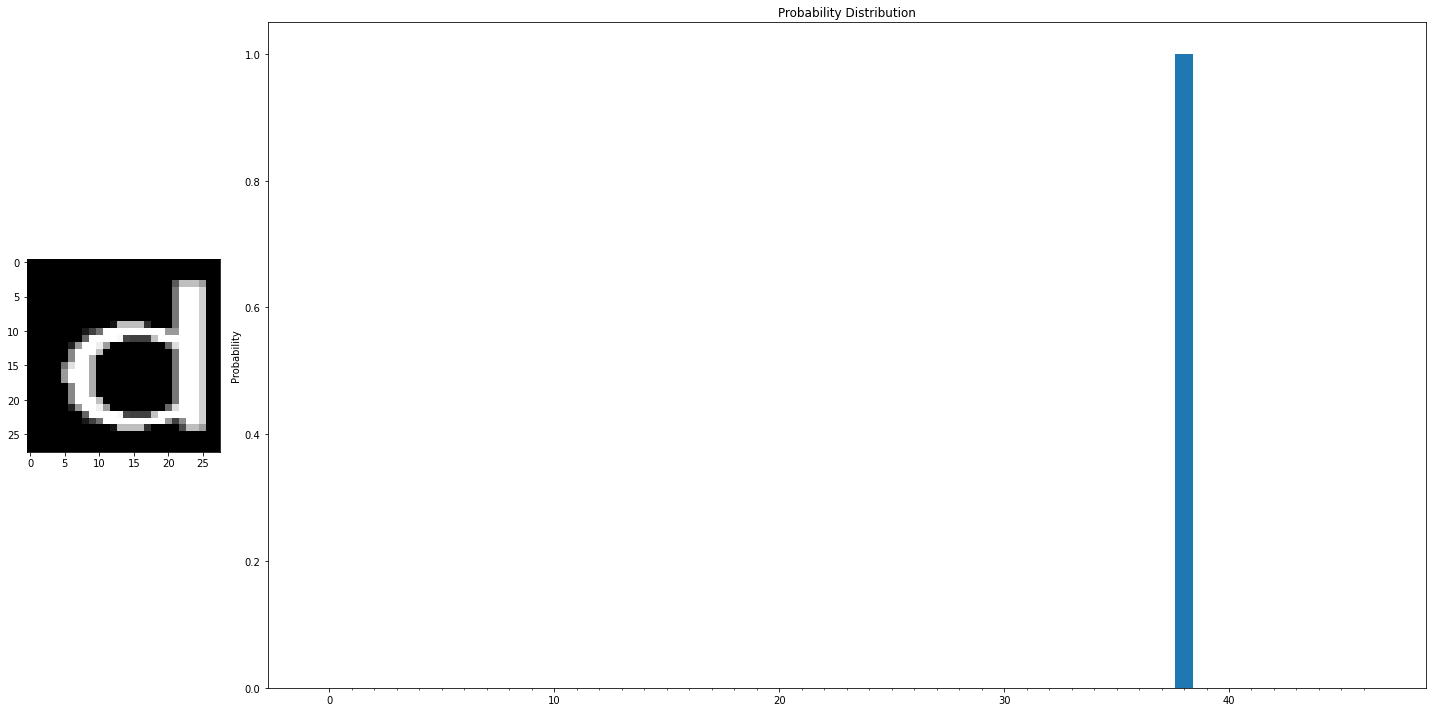

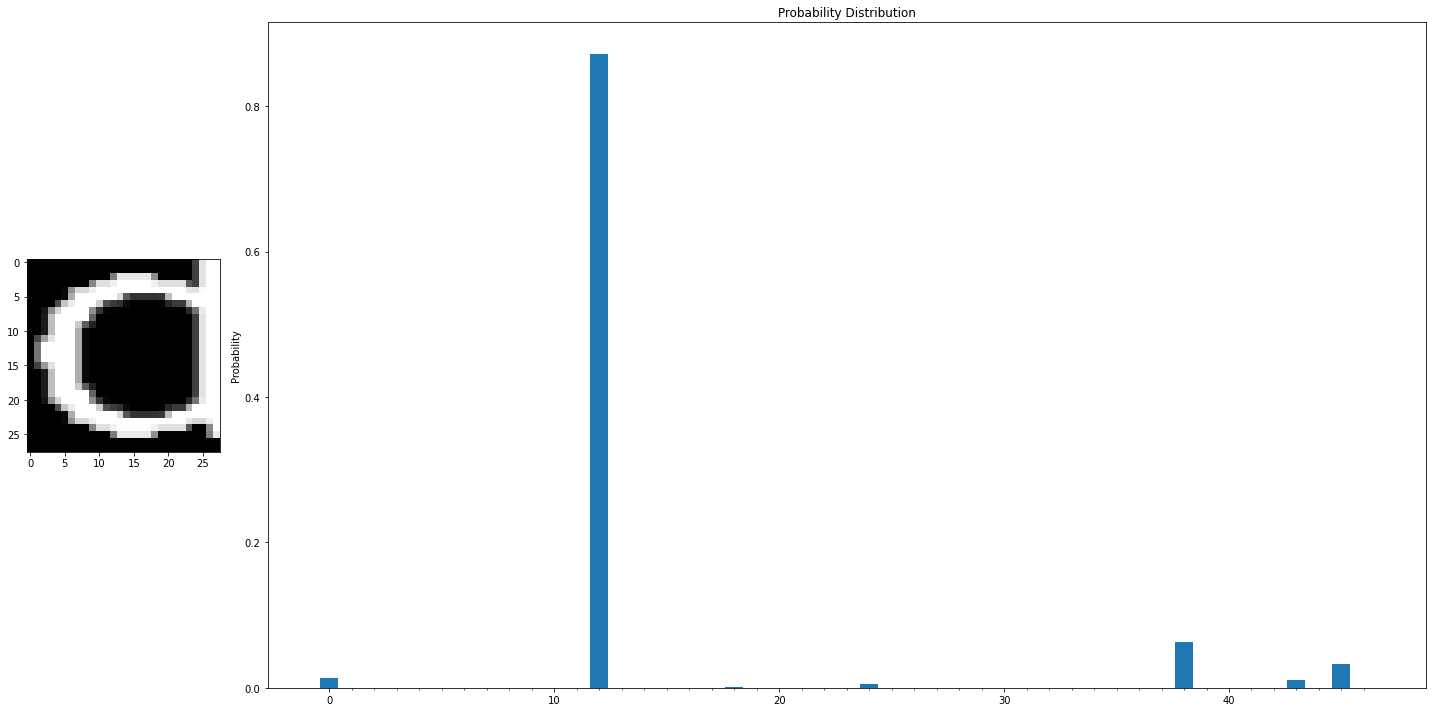

In [34]:
from matplotlib import gridspec
y_pos = np.arange(len(pred[0]))
xtick = [str(i) for i in range(len(pred[0]))]

for i in range(len(images)):
    fig = plt.figure(figsize=(20, 10)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[0.5, 3]) 
    ax0 = plt.subplot(gs[0])
    ax0.imshow(images[i], cmap='gray')
    ax1 = plt.subplot(gs[1])
    ax1.bar(y_pos, pred[i], align='center', alpha=1)
    ax1.set_xticks(y_pos, xtick)
    ax1.set_ylabel('Probability')
    ax1.set_title('Probability Distribution')
    plt.tight_layout()
    plt.show()

In [35]:
Dict = dict({0: '0', 1: '1', 2:'2', 3:'3', 4: '4', 5: '5', 6:'6',7:'7', 8: '8', 9: '9', 10:'A', 11:'B', 12: 'C', 13: 'D', 14:'E',15:'F', 16: 'G', 17:'H',18:'I',19:'J', 20:'K', 21:'L', 22: 'M', 23: 'N', 24:'O',25:'P', 26: 'Q', 27:'R',28:'S',29:'T', 30:'U', 31:'V', 32: 'W', 33: 'X', 34:'Y',35:'Z', 36: 'a', 37:'b',38:'d',39:'e', 40:'f', 41:'g', 42: 'h', 43: 'n', 44:'q',45:'r', 46: 't'}) 

In [36]:
word=[]
for i in range(len(final_pred)):
  word+=Dict[final_pred[i]]
print(word[:-1])  

['F', 'U', 'e', 'd']


In [39]:
w= ''.join([ch for ch in word[:-1]])
w

'FUed'

In [40]:
w=w.lower()
w

'fued'

In [41]:
w2=[]
for ch in w :
  w2.append(ch)

w2  

['f', 'u', 'e', 'd']

In [42]:

#vid=word_pred(can)
vid=word_pred(w2)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [43]:
print('Actual Captured Word :',w)
for i in range(len(vid)-1):
  print('Predicted word:', vid[i+1][0])


Actual Captured Word : fued
Predicted word: figured
Predicted word: furnished
Predicted word: refund
Predicted word: refused
Predicted word: unfounded
Predicted word: wonderful
Predicted word: abused
Predicted word: accused
Predicted word: accustomed
Predicted word: acquainted
